# ANOVA Test for Rations of Douro e Alentejano Red Wine
##### Gabriel dos Reis Estivalet (M20170043)     -     Nova IMS     -     Statistics    -    Dec/2017 

## 1. Introduction
This project aims to apply the ANOVA test into 3 samples of red wines from different regions in the world. More specifically, the Cabernet Sauvignon from Napa Valley in California, USA, the Malbec red wine from Mendoza, Argentina, and Alentejano Portuguese Red Wine, which are regarded among the best in their respective countries.

With that in mind, the Wine Reviews dataset from Kaggle will be used to make a comparison between these three selected groups. This dataset was scraped on November 22nd, 2017, and it presents a very large list of wines from all across the globe along with each wine's characteristics and, more importantly for our study, their respective scores from WineEnthusiast. The scale ranges from 1 to 100, but only the scores above 80 were included in the data.

Therefore, we can state the following:
* **Objective**: test the claim that all the sampled wines from each region are considered equivalently good.
* **Study variable**: Wine Scores.
* **Experimental units**: Red Wines.
* **Factor**: Provinces.
* **Factor levels (3 groups)**: Alentejano, Mendoza and Napa.
* **Sample size**: 30 randonly selected units in each group.


Dataset source: https://www.kaggle.com/zynicide/wine-reviews

### 1.1 Selecting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winemag-data_first150k.csv').drop('Unnamed: 0', axis=1)
print('There are {} rows in the dataset. Each one represent'.format(data.shape[0]),
      'a particular wine with 10 columns displaying all their \ncharacteristics.')
data.head(3)#displays first three lines

There are 150930 rows in the dataset. Each one represent a particular wine with 10 columns displaying all their 
characteristics.


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [3]:
mendoza = (data[['province','points']]
               [(data.country == 'Argentina') 
              & (data.province == 'Mendoza Province')
              & (data.region_1 == 'Mendoza')
              & (data.variety == 'Malbec')]
         .sample(n=30, replace=False, random_state=101)
         .sort_values(by='points', ascending=False)
         .reset_index()
         .drop('index', axis=1)
         .replace('Mendoza Province', 'Mendoza'))

napa = (data[['province','points']]
               [(data.country == 'US') 
              & (data.province == 'California') 
              & (data.region_1 == 'Napa Valley')
              & (data.variety == 'Cabernet Sauvignon')]
         .sample(n=30, replace=False, random_state=101)
         .sort_values(by='points', ascending=False)
         .reset_index()
         .drop('index', axis=1)
         .replace('California', 'Napa'))


alentejano =(data[['province','points']]
                [(data.country == 'Portugal')
                & (data.province == 'Alentejano') 
                & (data.variety == 'Portuguese Red')]
            .sample(n=30, replace=False, random_state=101)
            .sort_values(by='points', ascending=False)
            .reset_index()
            .drop('index', axis=1))

#all 3 region-tables have 30 rows and 2 columns.
print(napa.shape)
print(alentejano.shape)
print(mendoza.shape)

(30, 2)
(30, 2)
(30, 2)


In [4]:
selection = pd.concat([alentejano, napa, mendoza]).reset_index().drop('index', axis=1)
selection.head() #displays the first 5 rows of the selection table.

,province,points
0,Alentejano,94
1,Alentejano,92
2,Alentejano,92
3,Alentejano,91
4,Alentejano,90


In [5]:
selection.province.value_counts()

Mendoza       30
Napa          30
Alentejano    30
Name: province, dtype: int64

Now we have 3 tables with 30 randonly selected samples of wine from each province along with their respective scores. These 3 tables were concatenated to form a new table called **selection**. Its first 5 rows were displayed above (note that the first 5 entries are from Alentejano wines, but we can confirm that each region is being represent by 30 randonly selected wines in the code immediately above).

Once we have our data selected, we can start our exploratory analysis.

## 2. Methodology

The methodology applied will consist of applying the following tests:
* Shapiro-Wilk Test to acertain if the populations are normally distributed;
* Levene's Test to access if the variances of the populations are equal;
* Finally, if the data pass the previous tests, ANOVA will be applied to test for means equivalence between the populations tested.

In case the ANOVA test fails, an additional test of multiple comparison will be applied in order to test which pair(s) of means are different.

## 3. Results
### 3.1 Exploratory Data Analysis (EDA)

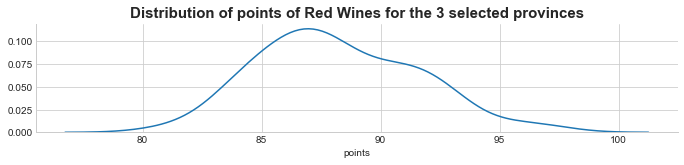

In [6]:
fig, ax = plt.subplots(figsize=(11.5,2))
sns.distplot(selection['points'], hist=False)
plt.title('Distribution of points of Red Wines for the 3 selected provinces', fontweight='bold', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

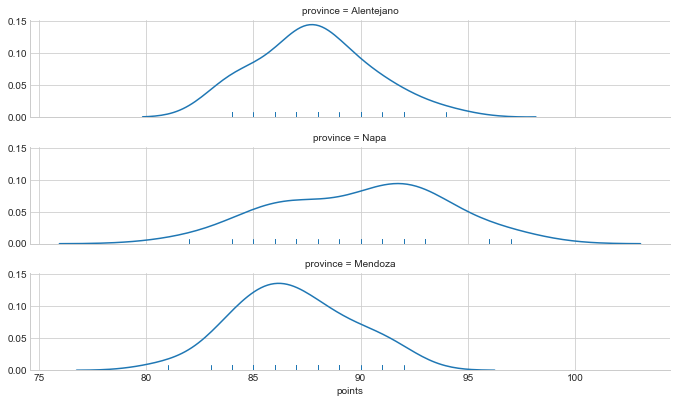

In [7]:
g = sns.FacetGrid(selection, row="province",
                  size=1.9, aspect=5,)
g.map(sns.distplot, "points", hist=False, rug=True);

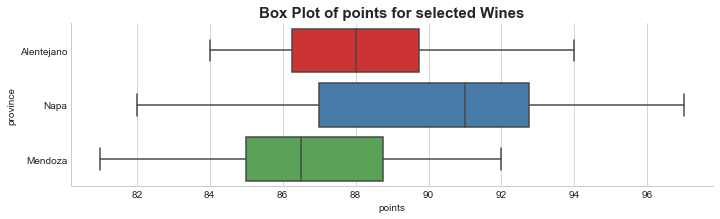

In [8]:
fig, ax = plt.subplots(figsize=(11.5,3))
sns.boxplot('points','province',data=selection, palette='Set1')
plt.title('Box Plot of points for selected Wines', fontweight='bold', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

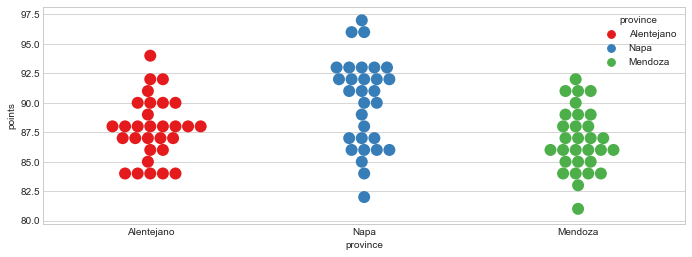

In [9]:
plt.figure(figsize=(11.5,4))
sns.swarmplot('province', 'points', hue='province', data=selection, size=12, palette='Set1')
plt.show()

Based on the plots above, we can see that the distribution of Alentejano's and Mendoza's wines seem to be a little bit more similar than Napa's. Some differences can also be seen in the box and swarm plots, which shows a contrast of quartiles between the regions and also that the Napa province presents a bigger variance, with the largest rating and also one of the smallest ones. The swarm plot displays additionally all the observations from each province along with its respective underlying distribution. Once again, Alentejano and Mendoza seem to be slightly more similar.

The same can be shown by looking at the **summary statistics** below.

In [10]:
df0 = pd.merge(alentejano.describe(),napa.describe(), left_index=True,
               right_index=True, suffixes=('_Alentejano','_Napa'))
df0.join(mendoza.describe().rename(columns={'points':'points_Mendoza'})).apply(lambda x: np.round(x,2))

,points_Alentejano,points_Napa,points_Mendoza
count,30.00,30.00,30.00
mean,87.80,90.00,86.83
std,2.59,3.76,2.64
min,84.00,82.00,81.00
25%,86.25,87.00,85.00
50%,88.00,91.00,86.50
75%,89.75,92.75,88.75
max,94.00,97.00,92.00


### 3.2 Distribution Fitting Test: Shapiro-Wilk

#### 1st Assumption: The Population is Normal
To evaluate the normality of both populations, we will use the Shapiro-Wilk test for an alpha=1%. In this test we are considering the following hypothesis:

* **H0**: all populations are normal.
* **H1**: at least one population is not normal.

In [11]:
a_test_stat, a_p_value = stats.shapiro(selection['points'][selection['province'] == 'Alentejano'])
n_test_stat, n_p_value = stats.shapiro(selection['points'][selection['province'] == 'Napa'])
m_test_stat, m_p_value = stats.shapiro(selection['points'][selection['province'] == 'Mendoza'])

norm_dict = {'Test Statistic':{'Alentejano': a_test_stat,
                              'Napa':n_test_stat, 'Mendoza':m_test_stat},
             'p-value':{'Alentejano':a_p_value,
                       'Napa':n_p_value, 'Mendoza':m_p_value}}

pd.DataFrame(norm_dict)

,Test Statistic,p-value
Alentejano,0.944568,0.120771
Mendoza,0.972731,0.616268
Napa,0.959600,0.302559


Given the p-values above, we see that all of them are greater than the confidence level of 1% and, therefore, we can't reject the normality hypothesis for this confidence level.

### 3.3 Test for Equality of Variances: Levene
#### 2nd Assumption: The 3 Normal Populations are Homoscedastic
To test this assumption, we will use the **Levene test** to evaluate the following hypothesis:
* **H0**: All variances are equal.
* **H1**: At least one pair of variances is different.

In [12]:
am_test_stat_levene, am_p_value = stats.levene(alentejano.points,mendoza.points)
an_test_stat_levene, an_p_value = stats.levene(alentejano.points,napa.points)
mn_test_stat_levene, mn_p_value = stats.levene(mendoza.points,napa.points)

levene_dict = {'Test Statistic': {'Alentejano & Mendoza':am_test_stat_levene,
                                  'Alentejano & Napa':an_test_stat_levene,
                                  'Mendoza & Napa':mn_test_stat_levene},
              'p-value': {'Alentejano & Mendoza':am_p_value,
                          'Alentejano & Napa':an_p_value,
                          'Mendoza & Napa':mn_p_value}}

pd.DataFrame(levene_dict) #Pairwise Levene Tests 

,Test Statistic,p-value
Alentejano & Mendoza,0.153862,0.696309
Alentejano & Napa,4.622725,0.035733
Mendoza & Napa,3.518321,0.065730


The p-values are greater than alpha=0.01 and, therefore, we can't reject the normal hypothesis for the 1% confidence level.

Since the data has passed in both the Shapiro and Levine's test for alpha=1%, let's proceed to the ANOVA test.

### 3.4 ANOVA
In order to access if the means of our populations are significantly different, we can compare the p-value we obtain from the one-way Anova test with our chosen significance level of 1%. If greater, we will not be able to reject the null hypothesis that states that all the means are equal. Let's proceed to the test of the following hypothesis:
* **H0**: All means are equal.
* **H1**: At least one pair of means is different.

In [13]:
stats.f_oneway(alentejano['points'],mendoza['points'],napa['points'])

F_onewayResult(statistic=8.5182783262423047, pvalue=0.00041830957589777116)

Since the Anova's p-value is lower than alpha=0.01, **we reject the null hypothesis that all the means are equal for a significant level of 1%**. In other words, there's at least 1 pair of means that is different. However, this test does not tell us which pair. To be able to identify which pairs are not equal, let's proceed to the Multiple Comparison Test.

### 3.5 Multiple Comparison Test: Tukey's HSD

In [14]:
from statsmodels.stats.multicomp import MultiComparison

multic = MultiComparison(selection['points'], selection['province'])
result = multic.tukeyhsd(alpha=0.01)
 
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.01
  group1    group2 meandiff  lower  upper  reject
-------------------------------------------------
Alentejano Mendoza -0.9667   -3.319 1.3857 False 
Alentejano   Napa    2.2    -0.1524 4.5524 False 
 Mendoza     Napa   3.1667   0.8143 5.519   True 
-------------------------------------------------


Based on the Tukey HSD test, there is significant evidence to reject the null hypothesis only for the group **'Mendoza & Napa'** for alpha=1%. This confirms the initial observations that Napa presented somewhat different values than the other 2 regions. Based on this test, this difference is significant enough to consider the means of Mendoza and Napa provinces to be different, while we can't say the same for the other two pairs for the given level of alpha. We can also see that the column **meandiff** above presents the difference of the means between the groups.

## 4. Conclusion

* The mean score levels of the group **Mendoza & Napa** are significantly different at the 1% significance level.
* For the 1% confidence level, the means of the groups **Alentejano & Mendoza** and **Alentejano & Napa** are equal.

## References
* http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/key-results/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
* https://www.kaggle.com/zynicide/wine-reviews

## Appendix

In [15]:
stats.f_oneway(alentejano['points'],mendoza['points'])

F_onewayResult(statistic=2.0479469308926017, pvalue=0.15777786358903875)

In [16]:
stats.f_oneway(alentejano['points'],napa['points'])

F_onewayResult(statistic=6.9623015873015861, pvalue=0.01067148960404808)

In [17]:
stats.f_oneway(mendoza['points'],napa['points'])

F_onewayResult(statistic=14.251293220800436, pvalue=0.00037845914789615018)

In [18]:
selection.groupby('province').agg('mean') #Means of the 3 provinces

,points
province,
Alentejano,87.800000
Mendoza,86.833333
Napa,90.000000


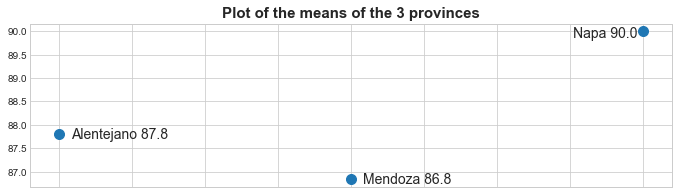

In [19]:
selection.groupby('province').agg('mean').plot(marker='o', markersize=10,linestyle='None', figsize=(11.5,3))
plt.text(0.04,87.7,'Alentejano {:.3}'.format(np.mean(
    selection.points[selection.province == 'Alentejano'])), fontsize=14)
plt.text(1.04,86.75,'Mendoza {:.3}'.format(np.mean(
    selection.points[selection.province == 'Mendoza'])), fontsize=14)
plt.text(1.76,89.87,'Napa {:.3}'.format(np.mean(
    selection.points[selection.province == 'Napa'])), fontsize=14)
plt.title('Plot of the means of the 3 provinces', fontweight='bold', fontsize=15)
plt.xlabel('')
plt.legend().set_visible(False)

In [20]:
selection.groupby('province').agg(np.var) #variances

,points
province,
Alentejano,6.717241
Mendoza,6.971264
Napa,14.137931
